# PCA for Image Compression and Classification

In this exercise you will:
* Implement PCA from scratch.
* Apply PCA for image compression.
* Use PCA-reduced data for classification tasks.
* Evaluate the impact of dimensionality reduction on model performance.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1. Implementing PCA from Scratch
Steps:
* Standardize the Data:
  Center the data by subtracting the mean of each feature.

* Compute the Covariance Matrix:
  Calculate the covariance matrix of the standardized data.

* Eigen Decomposition:
  Compute the eigenvalues and eigenvectors of the covariance matrix.

* Sort Eigenvectors:
  Sort the eigenvectors by decreasing eigenvalues to identify principal components.

* Project Data:
  Select the top k eigenvectors and project the data onto this new subspace.

In [ ]:
def pca(X, n_components):
    X_mean = np.mean(X, axis=0)
    X_meaned = X - X_mean
    cov_mat = np.cov(X_meaned, rowvar=False)
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    eigenvector_subset = sorted_eigenvectors[:, :n_components]
    X_reduced = np.dot(X_meaned, eigenvector_subset)

    return X_reduced, eigenvector_subset

# 2. Image Compression

* Load Fashion MNIST Dataset:
  Each image is 28x28 pixels, flattened into a 784-dimensional vector.

* Apply PCA:
  Reduce dimensions to k components (e.g., 10, 50, 100).

* Reconstruct Images:
  Project the reduced data back to the original space.

* Calculate Reconstruction Error:
  Use Mean Squared Error (MSE) to quantify the loss.

* Visualize Results:
  Compare original and reconstructed images side by side.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Reconstruction MSE with 50 components: 776.8711596001988


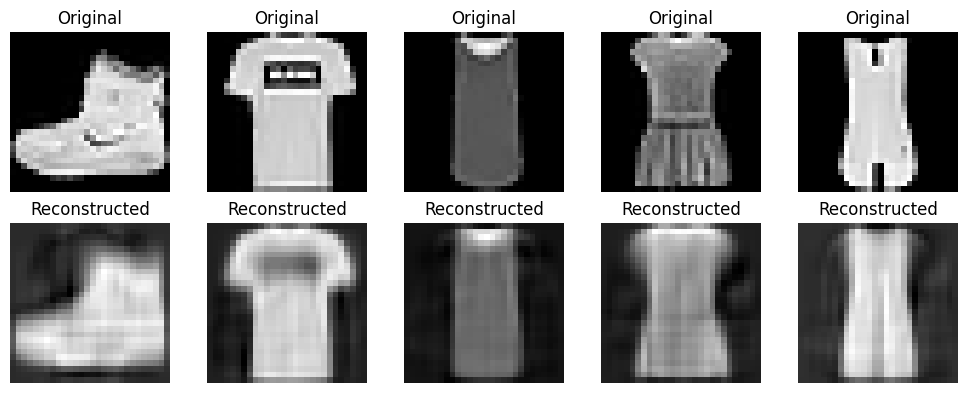

In [ ]:
# Load Fashion MNIST dataset
(X_train, _), _ = fashion_mnist.load_data()
# Flatten each 28x28 image into a 784-dimensional vector
X_train = X_train.reshape(-1, 784).astype(np.float32)

# Apply PCA to reduce to k components
gk = 50  # number of principal components
X_reduced, components = pca(X_train, gk)

# Reconstruct images from reduced representation
# Add back the mean that was subtracted during PCA
def reconstruct(X_reduced, components, X_original):
    X_mean = np.mean(X_original, axis=0)
    return np.dot(X_reduced, components.T) + X_mean

X_reconstructed = reconstruct(X_reduced, components, X_train)

# Calculate Reconstruction Error (Mean Squared Error)
mse = np.mean((X_train - X_reconstructed) ** 2)
print(f"Reconstruction MSE with {gk} components: {mse:.4f}")

# Visualize original vs reconstructed images
n_images = 5
plt.figure(figsize=(10, 4))
for i in range(n_images):
    # Original image
    plt.subplot(2, n_images, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed image
    plt.subplot(2, n_images, i+1+n_images)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()

# 3. Classification with Reduced Dimensions

* Prepare Labels:
Use the labels from the Fashion MNIST dataset.

* Split Data:
Divide into training and testing sets.

* Apply PCA:
Reduce dimensions to various k values.

* Train Classifier:
Use a classifier (e.g., Logistic Regression) on the reduced data.

* Evaluate Performance:
Assess accuracy and analyze the impact of dimensionality reduction.

In [ ]:
# Load Fashion MNIST with labels
(X_train_cls, y_train), (X_test_cls, y_test) = fashion_mnist.load_data()
# Flatten to (m, 784)
X_train_cls = X_train_cls.reshape(-1, 784).astype(np.float32)
X_test_cls  = X_test_cls.reshape(-1, 784).astype(np.float32)

# Number of components (reuse gk or set new k)
k = gk

# Compute reduced representations
X_train_reduced, components = pca(X_train_cls, k)
# Center test data using training mean
X_mean = np.mean(X_train_cls, axis=0)
X_test_meaned = X_test_cls - X_mean
X_test_reduced = np.dot(X_test_meaned, components)

# Train a logistic regression classifier on reduced data
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_reduced, y_train)

# Predict on test set and evaluate
y_pred = clf.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy with {k} components: {accuracy*100:.2f}%")


Classification accuracy with 50 components: 0.8255


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 4. Analysis and Reporting
* Explained Variance:
Plot the explained variance ratio to determine the optimal number of components.


> NOTE : You don't need to complete the section below; just plot the graph and include its analysis in your report.



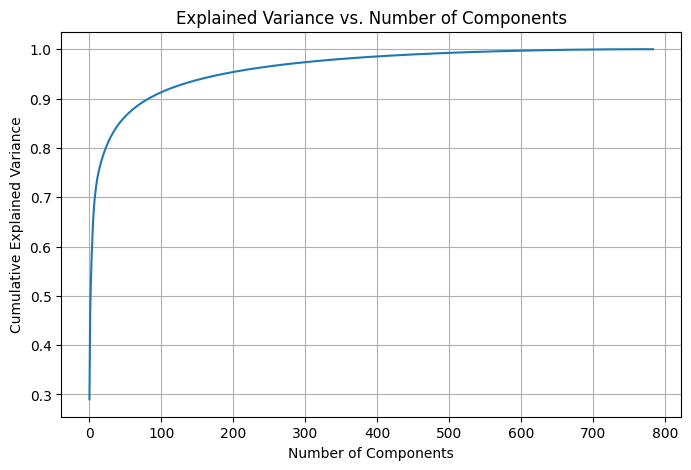

In [5]:
def explained_variance(X):
    X_meaned = X - np.mean(X, axis=0)
    cov_mat = np.cov(X_meaned, rowvar=False)
    eigen_values, _ = np.linalg.eigh(cov_mat)
    sorted_eigenvalues = np.sort(eigen_values)[::-1]
    explained_variances = sorted_eigenvalues / np.sum(sorted_eigenvalues)
    return explained_variances

# Calculate and plot
explained_var = explained_variance(X_train)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_var))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()
